# Homework 2
## GEO 371T/GEO 391

### Objectives: Learn to use pandas, numpy and seaborn
### We will use a well log 

qsiwell2.csv

https://pangea.stanford.edu/researchgroups/srb/resources/books/quantitative-seismic-interpretation

### What are well-logs?

Well-logs are single point measurements of physical properties of the subsurface recorded in a well and vary vertically with depth. The properties are random and aperiodic and depend on factors like mineral composition or lithology, porosity, cementation and compaction, presence of fluids etc., A suite of conventional well-logs recorded from an offshore area is shown. Each log (column) shows how the properties vary with depth. Here, we are looking at sediments that were deposited 5 to 16 million years ago!! 

Typical well log recording:
* DEPTH - depth at which measurements have been made
* VP - compression wave (P-wave) velocity
* VS - shear wave velocity
* RHO_OLD - density
* GR - Gamma ray count
* NPHI - Neutron porosity
* VPVS - Vp/Vs
* IP - P-impedance
* IS - Shear-impedance
* VSH - shale volume
* RHOm - maytrix density
* RHOf - fluid density
* PHI - porosity

Note: Once the log meaurements are made, a geologist would examine the values and come up with his interpretation of lithology/rock types (e.g., brine sand, gas-sand, oil-sand, shale etc) at each depth point.

## The Tasks

* Import well log data
* Examine the columns
* Remove bad values
* add/delete colums
* examine corrleaton between parameters
* create a new lithology curve log;
* plot different logs and the interpreted lithology



Import essential libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

### Set the directory path & load the data

In [38]:
dir = './homework_2_data.csv'
logs = pd.read_csv('./homework_2_data.csv')
logs
#Use the variable logs to load the data (for compatibility with later code)

,DEPTH,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOf,PHI
0,2013.2528,2294.7,876.9,1.9972,91.8785,0.4908,2.240104,1.0,1.0,2.616832,5144.846857,2112.418072,0.493621,2.728979,1.09,0.294312
1,2013.4052,2296.7,943.0,2.0455,86.8004,0.4833,2.240104,1.0,1.0,2.435525,5144.846857,2112.418072,0.436010,2.719762,1.09,0.294312
2,2013.5576,2290.4,912.5,2.1122,86.0021,0.4474,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.718313,1.09,0.292342
3,2013.7100,2277.5,891.6,2.1960,87.3570,0.4140,2.242800,1.0,1.0,2.554397,5107.977000,1999.680480,0.442325,2.720772,1.09,0.293096
4,2013.8624,2262.0,890.5,2.2020,90.4024,0.4293,2.240064,1.0,1.0,2.540146,5067.024768,1994.776992,0.476875,2.726300,1.09,0.297156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,2639.9216,3786.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.109168,NaN,NaN,0.122708,2.669633,NaN,NaN
4113,2640.0740,3786.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.109168,NaN,NaN,0.122708,2.669633,NaN,NaN
4114,2640.2263,3974.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.213880,NaN,NaN,0.122708,2.669633,NaN,NaN
4115,2640.3789,3974.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.213880,NaN,NaN,0.122708,2.669633,NaN,NaN


* What type of logs do we have?
* How many rows and how many columns?

In [39]:
count = logs.count()
num_columns = len(count)
num_rows = len(logs.index)
print(f"The number of row is {num_rows}\nThe number of column is {num_columns}")

The number of row is 4117
The number of column is 16


* Delete the column RHO_OLD
* check to make sure that it has indeed been deleted

In [40]:
logs.drop(['RHO_OLD'], axis=1)

,DEPTH,VP,VS,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOf,PHI
0,2013.2528,2294.7,876.9,91.8785,0.4908,2.240104,1.0,1.0,2.616832,5144.846857,2112.418072,0.493621,2.728979,1.09,0.294312
1,2013.4052,2296.7,943.0,86.8004,0.4833,2.240104,1.0,1.0,2.435525,5144.846857,2112.418072,0.436010,2.719762,1.09,0.294312
2,2013.5576,2290.4,912.5,86.0021,0.4474,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.718313,1.09,0.292342
3,2013.7100,2277.5,891.6,87.3570,0.4140,2.242800,1.0,1.0,2.554397,5107.977000,1999.680480,0.442325,2.720772,1.09,0.293096
4,2013.8624,2262.0,890.5,90.4024,0.4293,2.240064,1.0,1.0,2.540146,5067.024768,1994.776992,0.476875,2.726300,1.09,0.297156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,2639.9216,3786.8,1795.4,59.1847,0.0873,NaN,NaN,NaN,2.109168,NaN,NaN,0.122708,2.669633,NaN,NaN
4113,2640.0740,3786.8,1795.4,59.1847,0.0873,NaN,NaN,NaN,2.109168,NaN,NaN,0.122708,2.669633,NaN,NaN
4114,2640.2263,3974.8,1795.4,59.1847,0.0873,NaN,NaN,NaN,2.213880,NaN,NaN,0.122708,2.669633,NaN,NaN
4115,2640.3789,3974.8,1795.4,59.1847,0.0873,NaN,NaN,NaN,2.213880,NaN,NaN,0.122708,2.669633,NaN,NaN


How can we check if we have really deleted `RHO_OLD`:?

In [41]:
column_names = logs.columns
if "RHO_OLS" in column_names:
    print("There is RHO_OLS in logs")
else:
    print("There is no RHO_OLS in logs")

There is no RHO_OLS in logs


* Rename RHOf to RHOfluid (Hint, use DataFrame.rename() )


In [43]:
logs.rename(columns = {'RHOf' : ' RHOfluid'}, inplace = True)
logs

,DEPTH,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOfluid,PHI
0,2013.2528,2294.7,876.9,1.9972,91.8785,0.4908,2.240104,1.0,1.0,2.616832,5144.846857,2112.418072,0.493621,2.728979,1.09,0.294312
1,2013.4052,2296.7,943.0,2.0455,86.8004,0.4833,2.240104,1.0,1.0,2.435525,5144.846857,2112.418072,0.436010,2.719762,1.09,0.294312
2,2013.5576,2290.4,912.5,2.1122,86.0021,0.4474,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.718313,1.09,0.292342
3,2013.7100,2277.5,891.6,2.1960,87.3570,0.4140,2.242800,1.0,1.0,2.554397,5107.977000,1999.680480,0.442325,2.720772,1.09,0.293096
4,2013.8624,2262.0,890.5,2.2020,90.4024,0.4293,2.240064,1.0,1.0,2.540146,5067.024768,1994.776992,0.476875,2.726300,1.09,0.297156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4112,2639.9216,3786.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.109168,NaN,NaN,0.122708,2.669633,NaN,NaN
4113,2640.0740,3786.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.109168,NaN,NaN,0.122708,2.669633,NaN,NaN
4114,2640.2263,3974.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.213880,NaN,NaN,0.122708,2.669633,NaN,NaN
4115,2640.3789,3974.8,1795.4,2.3972,59.1847,0.0873,NaN,NaN,NaN,2.213880,NaN,NaN,0.122708,2.669633,NaN,NaN


* How do you check the min, max and mean values of a particular data column?

In [44]:
def rprsnt_vals(columnName):

    minimum = logs[columnName].min()
    maximum = logs[columnName].max()
    mean = logs[columnName].mean()
    std = logs[columnName].std()

    print(f"{columnName}:")
    print(f"min is {minimum}")
    print(f"max is {maximum}")
    print(f"mean is {mean}")
    print(f"std is {std}")
    print('\n')

* What are the min, max, std etc values of each column of the data?
* What are the min, max, std values of VP, VS, RHO, PHI?

In [45]:
rprsnt_vals(columnName='VP')
rprsnt_vals(columnName='VS')
rprsnt_vals(columnName='RHO')
rprsnt_vals(columnName='PHI')

VP:
min is 1439.9
max is 4431.0
mean is 2977.098761233908
std is 449.35555185554557


VS:
min is 688.8
max is 2427.8
mean is 1371.2939519067284
std is 297.0565524272961


RHO:
min is 2.036616
max is 2.54526800000003
mean is 2.2250446044057757
std is 0.06196094832547496


PHI:
min is 0.106843552116598
max is 0.376395815563212
mean is 0.2917599912480479
std is 0.032190537795390446




## Check for NaN values in the log
### Restrict your calculation to depth range 0-2400 m then replace the NaN values by the average 

In [46]:
logs = logs.loc[(logs.DEPTH>=0) & (logs.DEPTH<=2400)]
logs

,DEPTH,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOfluid,PHI
0,2013.2528,2294.7,876.9,1.9972,91.8785,0.4908,2.240104,1.0,1.0,2.616832,5144.846857,2112.418072,0.493621,2.728979,1.09,0.294312
1,2013.4052,2296.7,943.0,2.0455,86.8004,0.4833,2.240104,1.0,1.0,2.435525,5144.846857,2112.418072,0.436010,2.719762,1.09,0.294312
2,2013.5576,2290.4,912.5,2.1122,86.0021,0.4474,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.718313,1.09,0.292342
3,2013.7100,2277.5,891.6,2.1960,87.3570,0.4140,2.242800,1.0,1.0,2.554397,5107.977000,1999.680480,0.442325,2.720772,1.09,0.293096
4,2013.8624,2262.0,890.5,2.2020,90.4024,0.4293,2.240064,1.0,1.0,2.540146,5067.024768,1994.776992,0.476875,2.726300,1.09,0.297156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2399.2820,3095.5,1472.2,2.2199,61.2689,0.2948,2.228610,1.0,1.0,2.102636,6898.662255,3280.959642,0.146354,2.673417,1.09,0.280916
2534,2399.4343,3087.2,1498.1,2.2411,67.7739,0.3062,2.241000,1.0,1.0,2.060744,6918.415200,3357.242100,0.220153,2.685225,1.09,0.278471
2535,2399.5869,3090.6,1505.6,2.2408,71.3242,0.3174,2.242303,1.0,1.0,2.052736,6930.063197,3376.012150,0.260431,2.691669,1.09,0.280561
2536,2399.7393,3133.9,1514.6,2.2439,76.3347,0.3024,2.242821,1.0,1.0,2.069127,7028.776732,3396.976687,0.317276,2.700764,1.09,0.284302


Replace NaN

In [48]:
rows, cols = np.where(logs.isna()) # get row, col indices of where NaN exists

for row, col in zip(rows, cols):
    logs.iloc[row, col] = np.mean([logs.iloc[row-1, col], logs.iloc[row+1, col]]) # average adjacent values of NaN
    
logs

,DEPTH,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOfluid,PHI
0,2013.2528,2294.7,876.9,1.9972,91.8785,0.4908,2.240104,1.0,1.0,2.616832,5144.846857,2112.418072,0.493621,2.728979,1.09,0.294312
1,2013.4052,2296.7,943.0,2.0455,86.8004,0.4833,2.240104,1.0,1.0,2.435525,5144.846857,2112.418072,0.436010,2.719762,1.09,0.294312
2,2013.5576,2290.4,912.5,2.1122,86.0021,0.4474,2.241452,1.0,1.0,2.494961,5126.411928,2056.049276,0.439167,2.718313,1.09,0.292342
3,2013.7100,2277.5,891.6,2.1960,87.3570,0.4140,2.242800,1.0,1.0,2.554397,5107.977000,1999.680480,0.442325,2.720772,1.09,0.293096
4,2013.8624,2262.0,890.5,2.2020,90.4024,0.4293,2.240064,1.0,1.0,2.540146,5067.024768,1994.776992,0.476875,2.726300,1.09,0.297156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2399.2820,3095.5,1472.2,2.2199,61.2689,0.2948,2.228610,1.0,1.0,2.102636,6898.662255,3280.959642,0.146354,2.673417,1.09,0.280916
2534,2399.4343,3087.2,1498.1,2.2411,67.7739,0.3062,2.241000,1.0,1.0,2.060744,6918.415200,3357.242100,0.220153,2.685225,1.09,0.278471
2535,2399.5869,3090.6,1505.6,2.2408,71.3242,0.3174,2.242303,1.0,1.0,2.052736,6930.063197,3376.012150,0.260431,2.691669,1.09,0.280561
2536,2399.7393,3133.9,1514.6,2.2439,76.3347,0.3024,2.242821,1.0,1.0,2.069127,7028.776732,3396.976687,0.317276,2.700764,1.09,0.284302


> Note: Difference ways of refining data

In [10]:
logs2 = logs['DEPTH']>=0
logs2 = logs['DEPTH']<=2400
logs2

0       True
1       True
2       True
3       True
4       True
        ... 
2533    True
2534    True
2535    True
2536    True
2537    True
Name: DEPTH, Length: 2538, dtype: bool

In [11]:
index_refine = ((logs['DEPTH'] >= 0) & (logs['DEPTH']<=2400))

In [12]:
logs3 = logs.loc[logs2]
# or
# logs3 = logs.loc[index_refine]
logs3

,DEPTH,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOfluid,PHI
0,2013.2528,2294.7,876.9,1.9972,91.8785,0.4908,2.240104,1.0,1.0,2.616832,5144.846857,2112.418072,0.493621,2.728979,1.09,0.294312
1,2013.4052,2296.7,943.0,2.0455,86.8004,0.4833,2.240104,1.0,1.0,2.435525,5144.846857,2112.418072,0.436010,2.719762,1.09,0.294312
2,2013.5576,2290.4,912.5,2.1122,86.0021,0.4474,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.718313,1.09,0.292342
3,2013.7100,2277.5,891.6,2.1960,87.3570,0.4140,2.242800,1.0,1.0,2.554397,5107.977000,1999.680480,0.442325,2.720772,1.09,0.293096
4,2013.8624,2262.0,890.5,2.2020,90.4024,0.4293,2.240064,1.0,1.0,2.540146,5067.024768,1994.776992,0.476875,2.726300,1.09,0.297156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2399.2820,3095.5,1472.2,2.2199,61.2689,0.2948,2.228610,1.0,1.0,2.102636,6898.662255,3280.959642,0.146354,2.673417,1.09,0.280916
2534,2399.4343,3087.2,1498.1,2.2411,67.7739,0.3062,2.241000,1.0,1.0,2.060744,6918.415200,3357.242100,0.220153,2.685225,1.09,0.278471
2535,2399.5869,3090.6,1505.6,2.2408,71.3242,0.3174,2.242303,1.0,1.0,2.052736,6930.063197,3376.012150,0.260431,2.691669,1.09,0.280561
2536,2399.7393,3133.9,1514.6,2.2439,76.3347,0.3024,2.242821,1.0,1.0,2.069127,7028.776732,3396.976687,0.317276,2.700764,1.09,0.284302


# Compute lithofacies logs

### Complete the missing sections of code below
### First, restrict your calculation to depth range 2100-2400 m

* lithofacies will be computed using delimiting values in VSH (shale volume) and SW (water saturation)

1) sand_cutoff = 0.20 \
2) brine_sand = ((logs.VSH <= sand_cutoff) & (logs.SW >= 0.9)) \
3) oil_sand = ((logs.VSH <= sand_cutoff) & (logs.SW < 0.9)) \
4) shale = (logs.VSH > sand_cutoff)

### Use the above delimiting values to create the `LFC` log and store it into the  DataFrame

### Use this numeric scheme to store in the LFC log
* LFC=0: undef
* LFC=1: brine sand
* LFC=2: oil sand
* LFC=3: gas sand
* LFC=4: shale

### Then
* count the samples of each of the facies.
* make histogram plots
* make a 1X4 plot as follows:
** (1,1) Vsh, phi and Sw
** (1,2) Ip
** (1,3) Vp/vs
** (1,4) lithofacies (different colors for different facies)
** Makes sure to put axes labels, captions, legend etc.

#### Include your code here

In [13]:
logs = logs.loc[(logs.DEPTH>=2100) & (logs.DEPTH<=2400)]

sand_cutoff = 0.20
brine_sand = ((logs.VSH <= sand_cutoff) & (logs.SW >= 0.9))

#FILL IN YOUR CODE HERE
oil_sand = ((logs.VSH <= sand_cutoff) & (logs.SW < 0.9))
shale = (logs.VSH > sand_cutoff)

In [14]:
logs

,DEPTH,VP,VS,RHO_OLD,GR,NPHI,RHO,SW,SWX,VPVS,IP,IS,VSH,RHOm,RHOfluid,PHI
570,2100.1208,2379.6,948.0,2.2562,91.5983,0.4117,2.256416,1.0,0.881680,2.510127,5369.367514,2139.082368,0.490442,2.728471,1.09,0.288107
571,2100.2732,2386.1,942.7,2.2579,94.3741,0.4241,2.259464,1.0,0.886768,2.531134,5391.307050,2129.996713,0.521934,2.733509,1.09,0.288435
572,2100.4255,2386.0,944.2,2.2622,94.2315,0.4307,2.265315,1.0,0.906035,2.527007,5405.041590,2138.910423,0.520316,2.733251,1.09,0.284762
573,2100.5779,2394.3,989.2,2.2750,92.6377,0.4179,2.278895,1.0,0.938551,2.420441,5456.358299,2254.282934,0.502234,2.730358,1.09,0.275222
574,2100.7305,2372.0,984.0,2.2854,92.4617,0.4056,2.286220,1.0,0.983701,2.410569,5422.913840,2249.640480,0.500238,2.730038,1.09,0.270614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533,2399.2820,3095.5,1472.2,2.2199,61.2689,0.2948,2.228610,1.0,1.000000,2.102636,6898.662255,3280.959642,0.146354,2.673417,1.09,0.280916
2534,2399.4343,3087.2,1498.1,2.2411,67.7739,0.3062,2.241000,1.0,1.000000,2.060744,6918.415200,3357.242100,0.220153,2.685225,1.09,0.278471
2535,2399.5869,3090.6,1505.6,2.2408,71.3242,0.3174,2.242303,1.0,1.000000,2.052736,6930.063197,3376.012150,0.260431,2.691669,1.09,0.280561
2536,2399.7393,3133.9,1514.6,2.2439,76.3347,0.3024,2.242821,1.0,1.000000,2.069127,7028.776732,3396.976687,0.317276,2.700764,1.09,0.284302


In [15]:
print(type(shale))
shale.values

<class 'pandas.core.series.Series'>


array([ True,  True,  True, ...,  True,  True,  True])


Use the above flag logs to create the `LFC` log and store it into the `logs` DataFrame:

In [16]:
temp_lfc = np.zeros(np.shape(logs.VSH))
temp_lfc[brine_sand.values] = 1    # LFC will be 1 when ssb (brine sand flag) is True

#FILL IN YOUR CODE HERE TO INCLUDE OIL SAND AND SHEL IN TEMP_LFC
logs['LFC'] = temp_lfc             # Copy the temporary log temp_lfc into the DataFrame with name `LFC`

logs.to_csv('qsiwell2_lfc.csv', index=False) # save the data

In [17]:
# yc:

for a, b in enumerate(oil_sand.values):
    if b == True:
        temp_lfc[a] = 2
    else:
        pass
    
for a, b in enumerate(shale.values):
    if b == True:
        temp_lfc[a] = 4
    else:
        pass

In [20]:
# yc:
print(temp_lfc)
print(type(temp_lfc))
print(np.shape(logs.VSH))
print(brine_sand.values)
print(logs['LFC'])
print(temp_lfc[40:70])

[4. 4. 4. ... 4. 4. 4.]
<class 'numpy.ndarray'>
(1968,)
[False False False ... False False False]
570     0.0
571     0.0
572     0.0
573     0.0
574     0.0
       ... 
2533    1.0
2534    0.0
2535    0.0
2536    0.0
2537    0.0
Name: LFC, Length: 1968, dtype: float64
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4.]


Now, let's see if this is all ok; the total number of samples after zooming in the 2100-2400 m depth window is:

In [21]:
np.shape(logs.VSH)

(1968,)

and the following prints out how many samples each facies is made of:

In [22]:
string = "brine sst={0}, oil sst={1}, shale={2}"
data = (np.count_nonzero(brine_sand),
        np.count_nonzero(oil_sand),
        np.count_nonzero(shale))
print(string.format(*data,))

brine sst=706, oil sst=134, shale=1128


In [23]:
# yc:
check = *data,
print(check)
type(check)

(706, 134, 1128)


tuple

And a final check to make this newly defined `LFC` log only has values within the range 1 to 4 (there will be no undefined samples in this particular depth interval, i.e. classes with `LFC=0`):

In [24]:
logs['LFC'] = temp_lfc
print("LFC min: {0}, LFC max: {1}".format(logs.LFC.min(), logs.LFC.max()))

LFC min: 1.0, LFC max: 4.0


It is very easy to do plots of all types with `pandas`, and to show that here's a one-liner that plots $V_\mathrm{P}$ histograms for each class (remember that at this point we only have classes 1, 2 and 4, i.e. brine sand, oil sand and shales):

array([<AxesSubplot:title={'center':'1.0'}>,
       <AxesSubplot:title={'center':'2.0'}>,
       <AxesSubplot:title={'center':'4.0'}>], dtype=object)

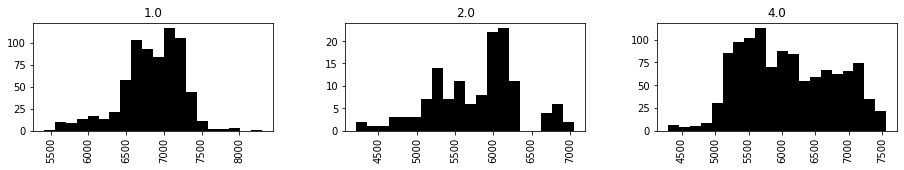

In [25]:
logs.IP.hist(bins=20, color='black', by=logs.LFC, figsize=(15,2), layout=(1,3), lw=0)
#plt.savefig("histograms.png", dpi=250)

## Summary plots

The next few cells visualize the results. No need to do anything until the IP/VPVS crossplot.

First we need a custom colormap for my classes, i.e. a discrete colormap with following classes-colors association:

* LFC=0: undef, GRAY
* LFC=1: brine sand, BLUE
* LFC=2: oil sand, GREEN
* LFC=3: gas sand, RED
* LFC=4: shale, BROWN

This is the way to define this colormap:

In [26]:
import matplotlib.colors as colors
#      0=undef   1=bri  2=oil   3=gas 4=shale
ccc = ['#B3B3B3','blue','green','red','#996633',]
# cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')
cmap_facies = colors.ListedColormap(ccc, 'indexed')

Let's now display a summary view of all the logs:

[Text(-50.0, 0, ''), Text(0.0, 0, ''), Text(50.0, 0, ''), Text(100.0, 0, '')]

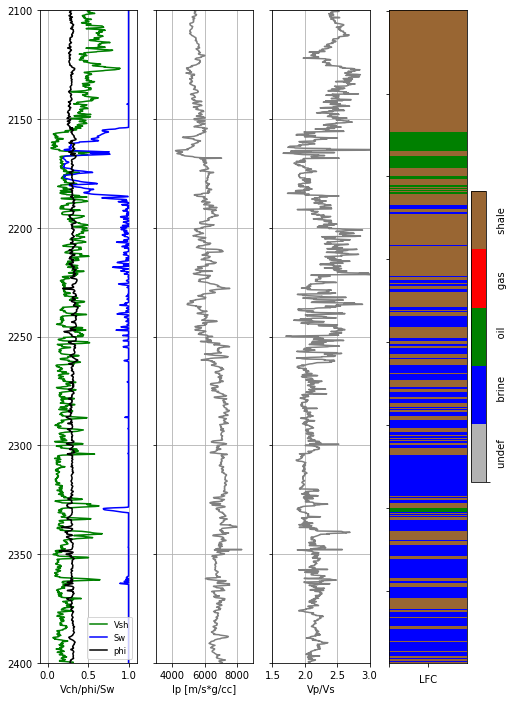

In [27]:
ztop=2100; zbot=2400
ll=logs.loc[(logs.DEPTH>=ztop) & (logs.DEPTH<=zbot)]

cluster=np.repeat(np.expand_dims(ll['LFC'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(8, 12))
ax[0].plot(ll.VSH, ll.DEPTH, '-g', label='Vsh')
ax[0].plot(ll.SW, ll.DEPTH, '-b', label='Sw')
ax[0].plot(ll.PHI, ll.DEPTH, '-k', label='phi')
ax[1].plot(ll.IP, ll.DEPTH, '-', color='0.5')
ax[2].plot(ll.VPVS, ll.DEPTH, '-', color='0.5')
im=ax[3].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=0,vmax=4)

cbar=plt.colorbar(im, ax=ax[3])
# cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
# cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1))
# cbar.set_label(['undef', 'brine', 'oil', 'gas', 'shale'])
cbar.set_label((12*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
cbar.set_ticks(range(0,1))
cbar.set_ticklabels('')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
ax[0].legend(fontsize='small', loc='lower right')
ax[0].set_xlabel("Vch/phi/Sw"),    ax[0].set_xlim(-.1,1.1)
ax[1].set_xlabel("Ip [m/s*g/cc]"), ax[1].set_xlim(3000,9000)
ax[2].set_xlabel("Vp/Vs"),         ax[2].set_xlim(1.5,3)
ax[3].set_xlabel('LFC')
ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([]); ax[3].set_xticklabels([])

#plt.savefig("log.png", dpi=250)

### The following code will make a cross-plot of IP vs VPVS and color code using lithofacies. 
### Comment on the results.

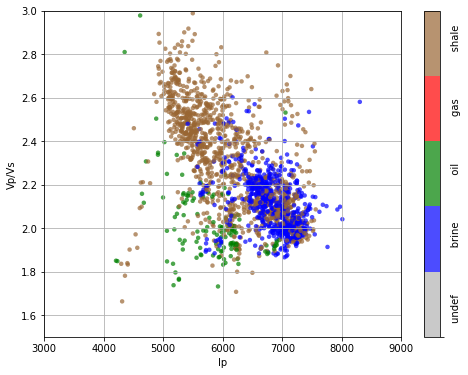

In [28]:
plt.figure(figsize=(8,6))

plt.scatter(logs.IP, logs.VPVS, s=20 , c=logs.LFC,
            marker='o', edgecolors='none',
            alpha=0.7, cmap=cmap_facies,
            vmin=0, vmax=4)
plt.xlim(3000, 9000); plt.ylim(1.5, 3);
plt.xlabel('Ip'); plt.ylabel('Vp/Vs')
plt.grid();

cbar = plt.colorbar()
cbar.set_label((15*' ').join(['undef', 'brine', 'oil', 'gas', 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

#plt.savefig("crossplot.png", dpi=250)

yc
Comment: Shales seem to have a negative correation between lp and Vp/Vs while brines do not have a meaningful relationship between those two values. Oils apear that they have low lp and Vp/Vs compared to the other two features.

### Make crossplots between IP, VPVS, VSH, SW using seaborn

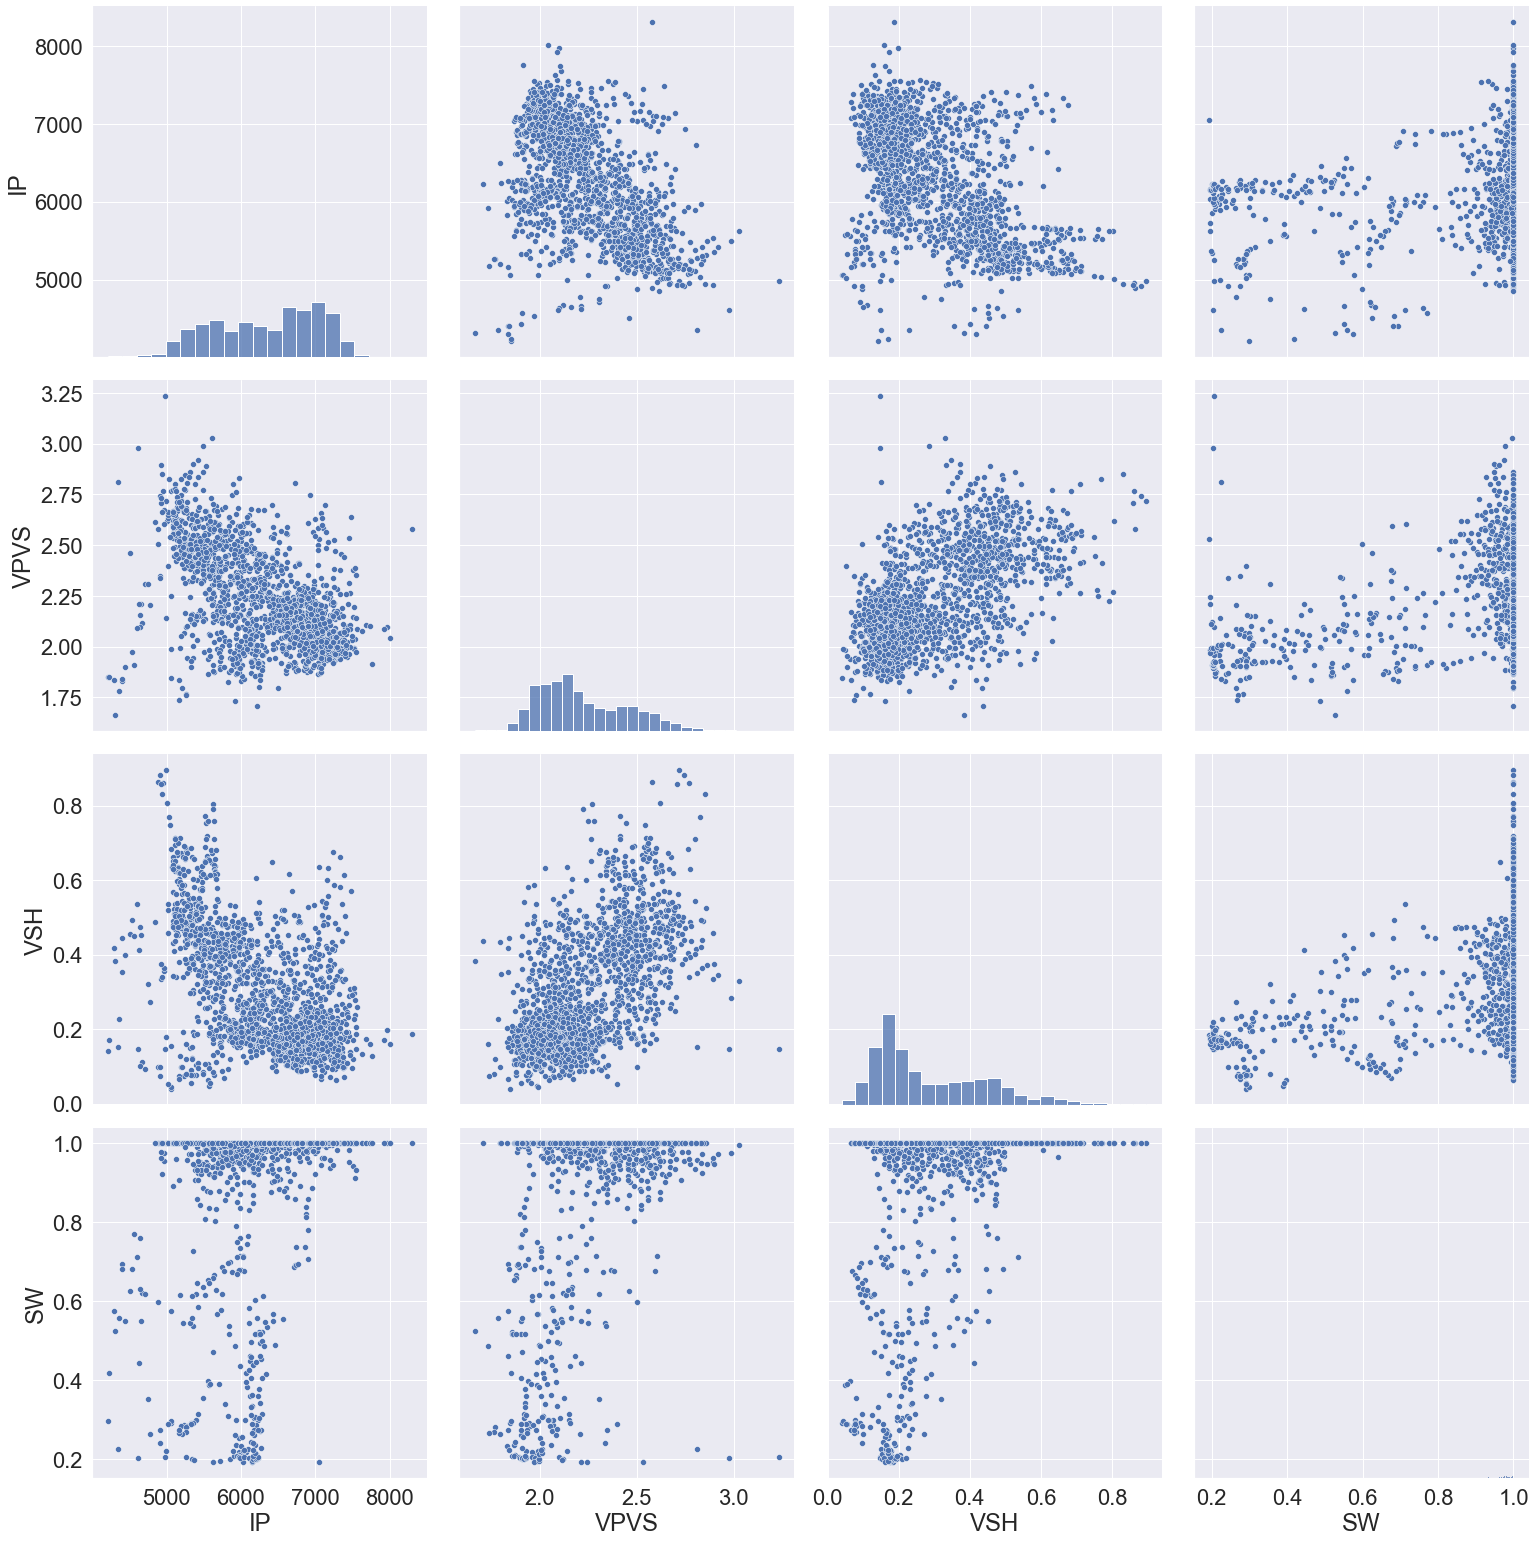

In [29]:
cols = ['IP','VPVS','VSH','SW']

import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(logs.loc[:, cols], height=5.5)

### Make correlation plots between IP, VPVS, VSH, SW using seaborn heatmap

[Text(0, 0.5, 'IP'),
 Text(0, 1.5, 'VPVS'),
 Text(0, 2.5, 'VSH'),
 Text(0, 3.5, 'SW')]

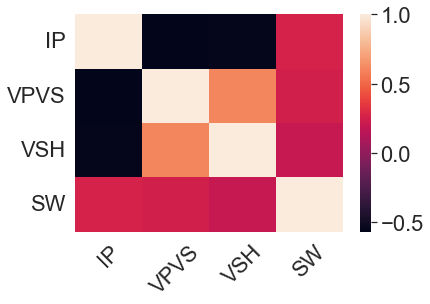

In [30]:
cm = np.corrcoef(logs[cols].values.T)
hm = sns.heatmap(cm)
hm.set_xticklabels(cols, rotation=45)
hm.set_yticklabels(cols, rotation=0)

## References

* Avseth, P., Mukerji, T. & Mavko, G. Quantitative Seismic Interpretation. (Cambridge University Press, 2005).


See also the awesome collection of tutorials curated by Matt Hall for [The Leading Edge](http://library.seg.org/journal/leedff) and available here: <https://github.com/seg/tutorials>

<hr />
<p style="color:gray">©2015 Alessandro Amato del Monte, openly licensed under the terms of <a href="https://creativecommons.org/licenses/by-sa/4.0/">CC-BY-SA</a>. This tutorial appeared in SEG Leading Edge in April 2015. </p>